### Dataset of Choice:
I chose the `SyriaTel Customer Churn Dataset` primarily because it falls within the telecommunications industry. Telecom companies, including industry giants like Safaricom, are among the most prominent enterprises in Africa. Therefore, targeting them as potential future clients or employers, it makes sense to gain familiarity with handling datasets specific to their industry.


The subject dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

### Business Understanding
`Objective:` The primary goal is to predict customer churn for SyriaTel, a telecommunications company, to develop strategies for retaining customers.
`Importance:` Customer retention is vital for sustaining revenue and reducing costs associated with acquiring new customers. Understanding why customers are 'churning' can help in designing targeted interventions to retain valuable customers.


#### Key Business Questions
1. What are the main factors influencing customer churn?
2. Which customers are most likely to churn?
3. How can SyriaTel reduce its churn rate?
4. Which ML model would be most suitable to predict churn?

#### Our Stakeholders
1. `The Sales & Marketing Team:` Interested in identifying customers at risk of churning to implement targeted retention campaigns.
2. `The Customer Service Team:` Needs to understand common issues leading to churn to improve service quality.

### Data Understanding
Let's take a look at our data and try to familiarize ourselves with it.

In [1]:
# Import the necessary libaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import joblib

In [2]:
#load and Inspect the first 5 rows of our dataset.
data = pd.read_csv('SyriaTel.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#let's see how big our raw dataset is
data.shape

(3333, 21)

#### Column Breakdown
Here we see the a breakdown of the 21 columns in our dataset and what they represent:

`state:`The state where the customer resides.<br>
`account length:` The number of days the account has been active.<br>
`area code:` The area code of the customer’s phone number.<br>
`phone number:` The customer’s phone number.<br>
`international plan:` Whether the customer has an international plan (yes/no).<br>
`voice mail plan:` Whether the customer has a voice mail plan (yes/no).<br>
`number vmail messages:` The number of voice mail messages.<br>
`total day minutes:` Total minutes of calls during the day.<br>
`total day calls:` Total number of calls during the day.<br>
`total day charge:` Total charge for calls during the day.<br>
`total eve minutes:` Total minutes of calls during the evening.<br>
`total eve calls:` Total number of calls during the evening.<br>
`total eve charge:` Total charge for calls during the evening.<br>
`total night minutes:` Total minutes of calls during the night.<br>
`total night calls:` Total number of calls during the night.<br>
`total night charge:` Total charge for calls during the night.<br>
`total intl minutes:` Total minutes of international calls.<br>
`total intl calls:` Total number of international calls.<br>
`total intl charge:` Total charge for international calls.<br>
`customer service calls:` Number of calls to customer service.<br>
`churn:` Whether the customer has churned (True/False).<br>

In [4]:
#Checking for any missing values in the dataset
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
#Checking for any duplicates in the dataset
data.duplicated().sum()

0

In [6]:
# Checking for summary infor on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Comments:
We have a dataset of 21 columns and 3,333 rows(entries). 
The columns description has been provided above for reference.
Our dataset is notably clean, it neither has duplicated values nor does it have missing values.
Out of the 21 columns, 16 are numeric(floats and integers) and our Target (Churn column) is of boolean type(Yes/No) hence indicating our task is a classification problem.    

#### Summary Statistics

In [7]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


##### Comments:
There are features with many zero values (e.g., voice mail messages, international minutes), suggesting that many customers do not use these services. This could be an important factor in understanding customer behavior and churn.


### Univariate Analysis

Let's further explore the distribution of these individual features

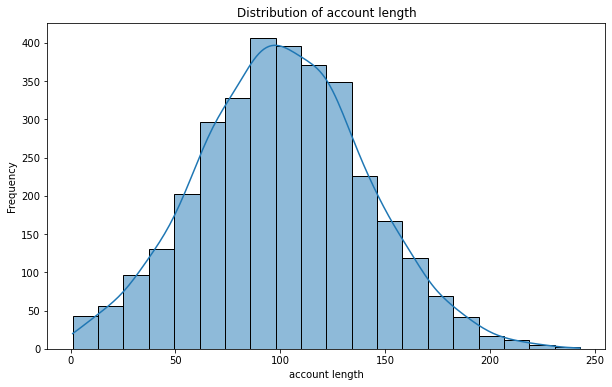

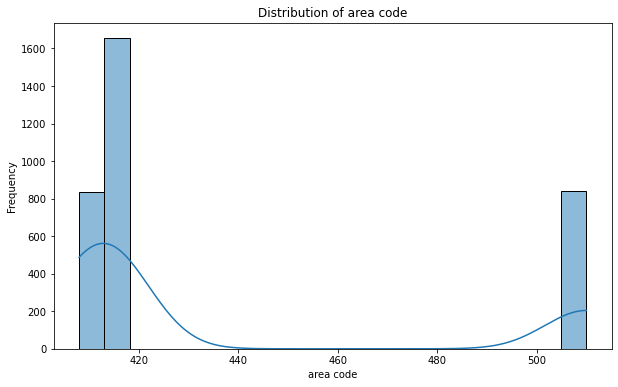

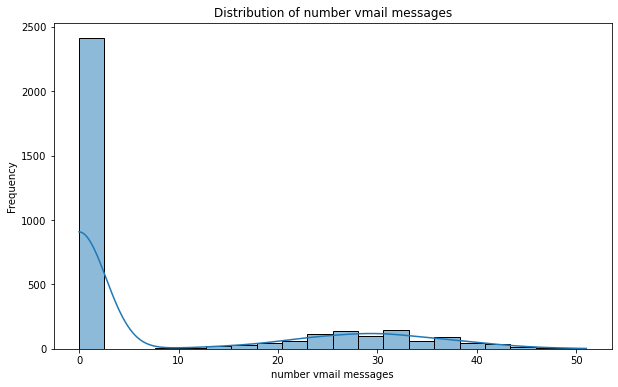

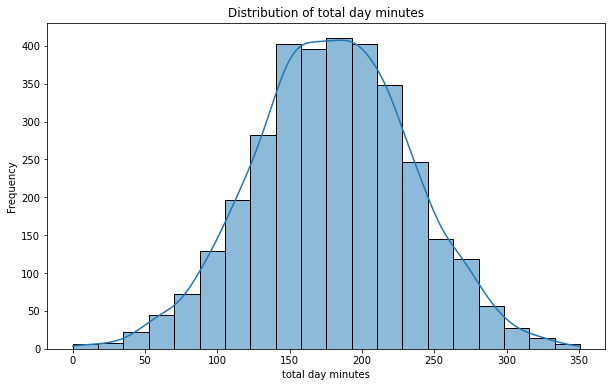

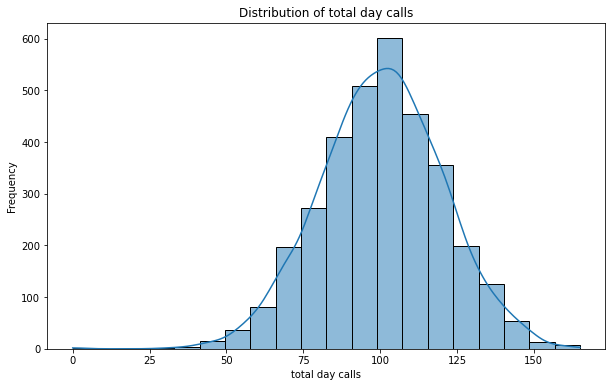

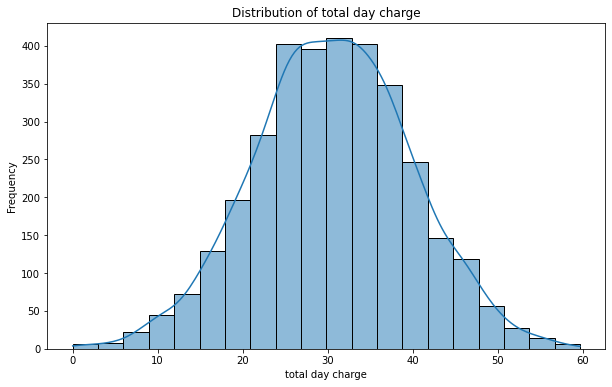

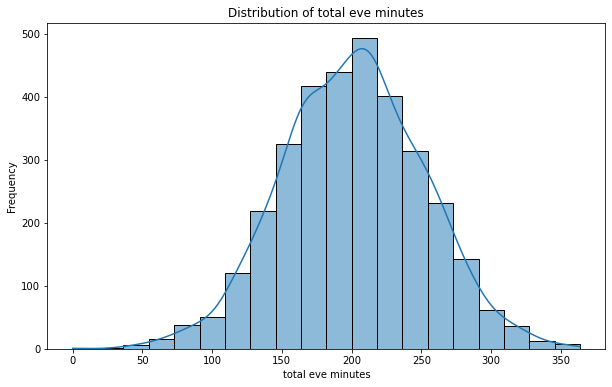

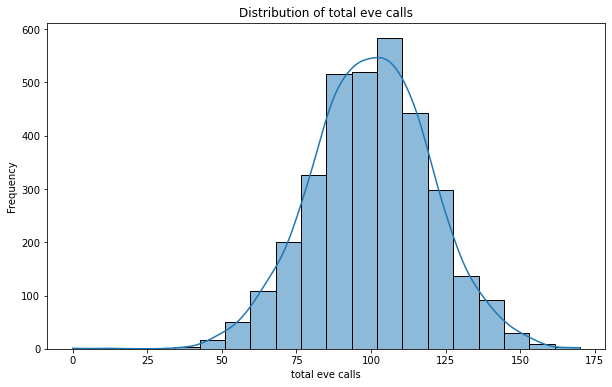

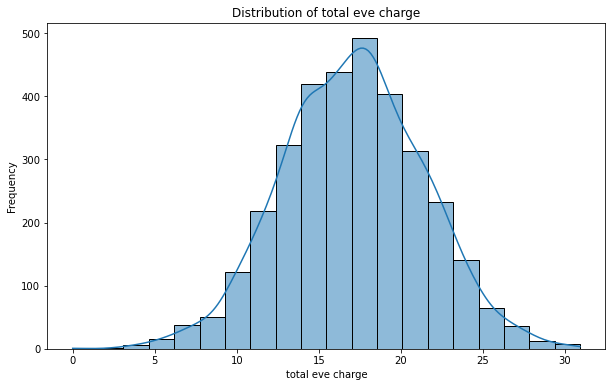

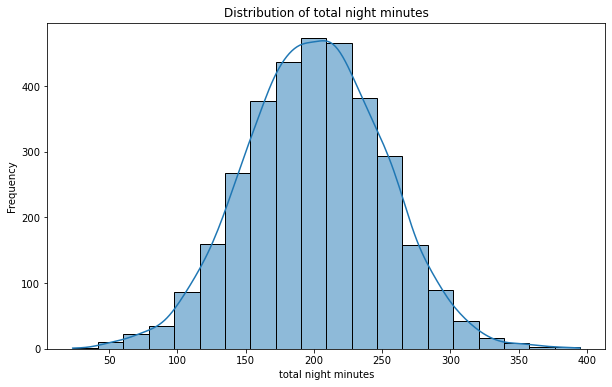

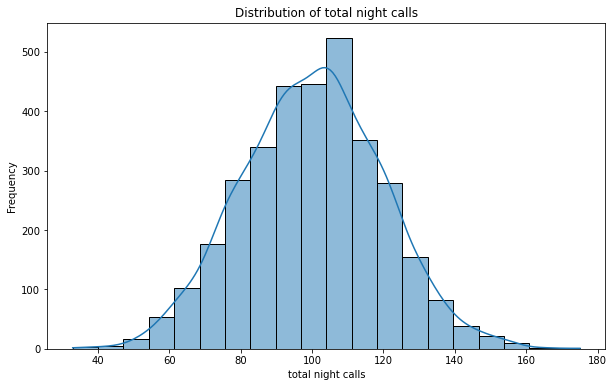

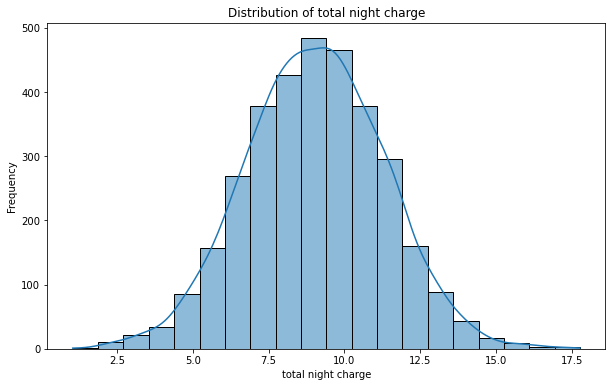

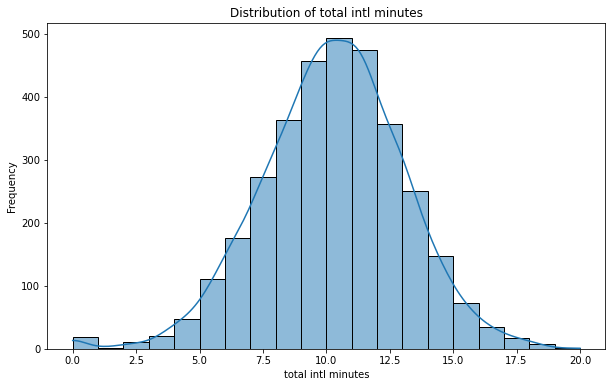

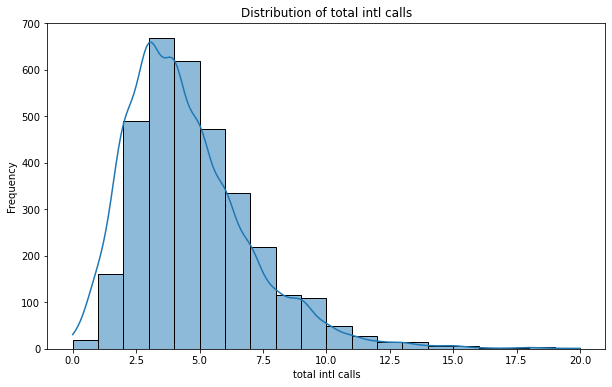

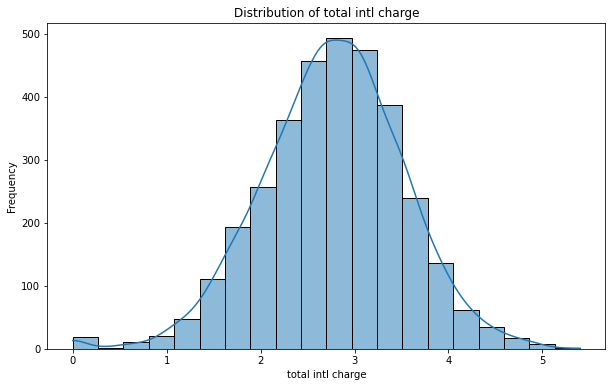

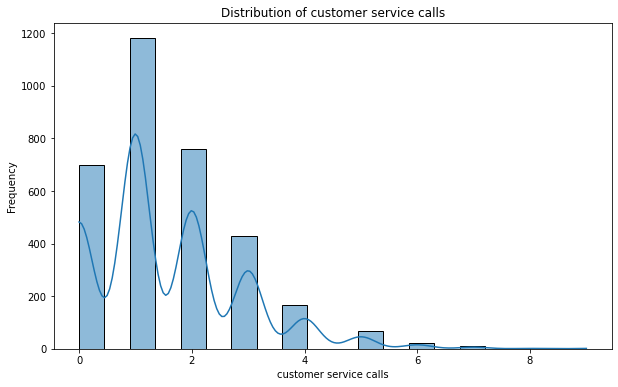

In [8]:
# Univariate Analysis For all features except the phone no.
# Univariate Analysis for Numerical Features
numerical_features = data.select_dtypes(include = ['int64', 'float64'])

# Histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#### Comments:
Majority of the numerical features exhibit a normal distribution.

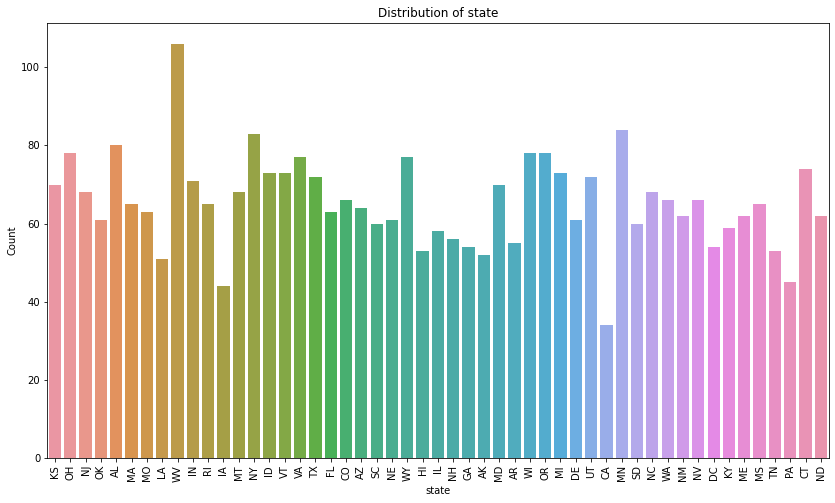

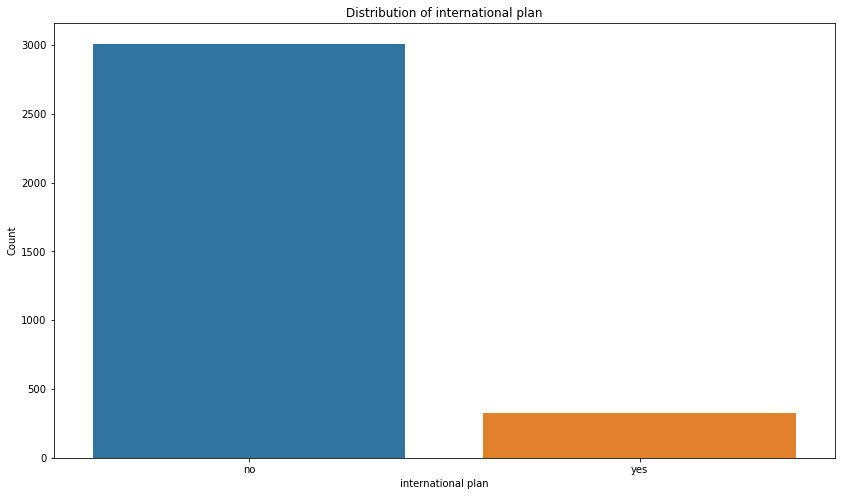

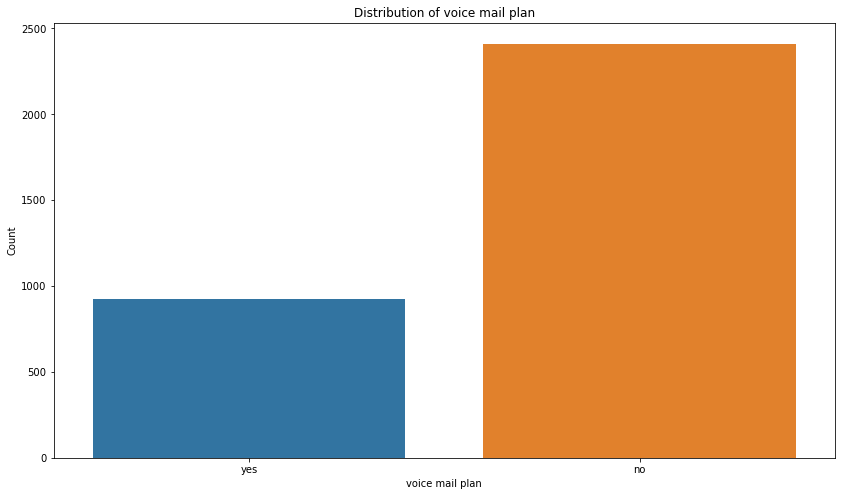

In [9]:
# Univariate Analysis for Categorical Columns
categorical_features = data[['state', 'international plan', 'voice mail plan']]
# Bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90 if feature == 'state' else 0)
    plt.show()

#### Comments:
Based on the plots above, it is evident that most customers do not utilize the voicemail and international plans. Further analysis will be conducted to explore the impact of these features on the churn rate.

The distribution of customers across different states is generally even, with West Virginia (WV) having the highest number of customers and California (CA) having the lowest.




### Target Variable Analysis

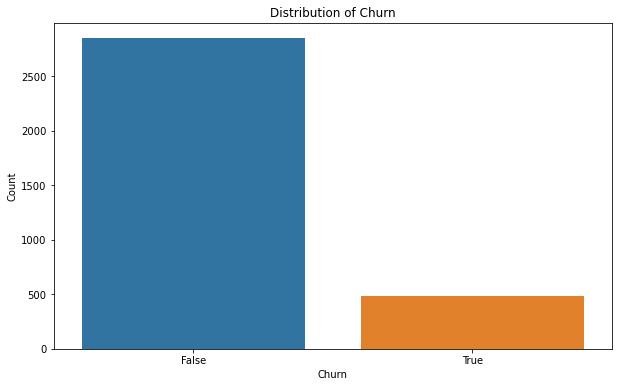

In [10]:
# Univariate Analysis for Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(x=data['churn'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [11]:
#Let's calculate the churn rate.
churn_rate = (data["churn"].mean())* 100

print(f"Churn Rate: {churn_rate:.2f}%")
print(data['churn'].value_counts())

Churn Rate: 14.49%
False    2850
True      483
Name: churn, dtype: int64


#### Comments:
SyriaTel's churn rate of 14.49% is way below the industrial standard of 30 - 35%(source = Google) but we can still explore our data further and derive more insights to lower it even further.

NB: It is evident from the visual above that we have a class imbalance issue that we will have to remedy before the modelling process is started.

### Bi_variate Analysis
Let's see how some of these features relate/affect the target variable(Churn).

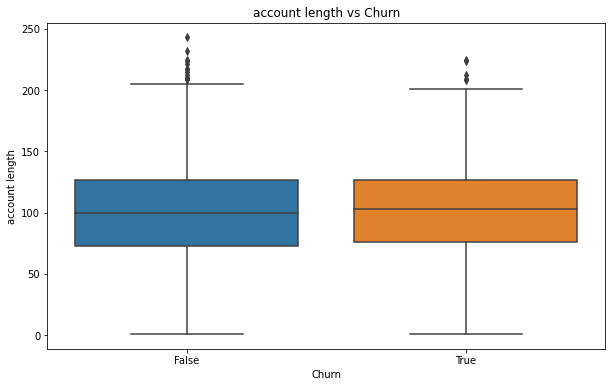

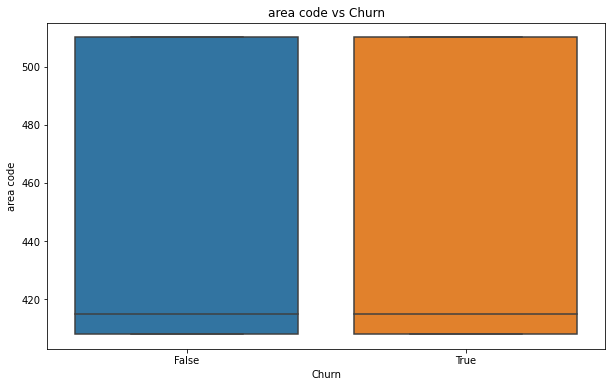

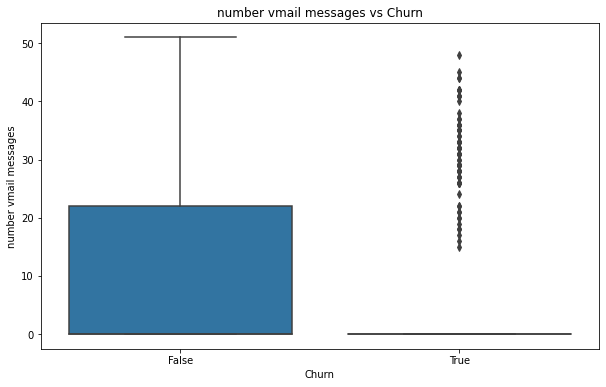

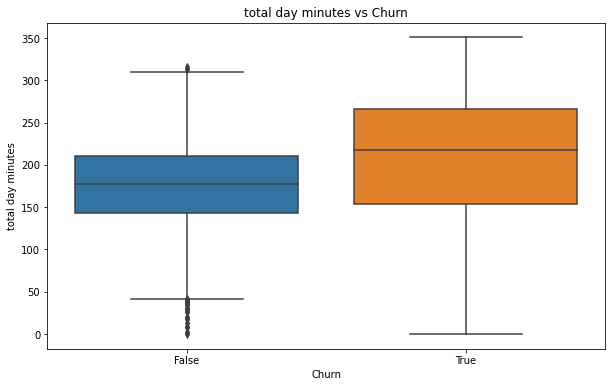

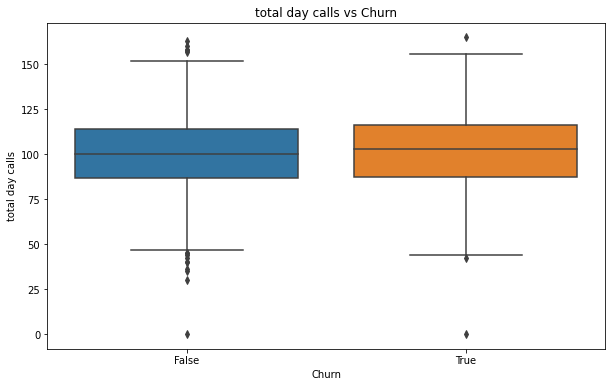

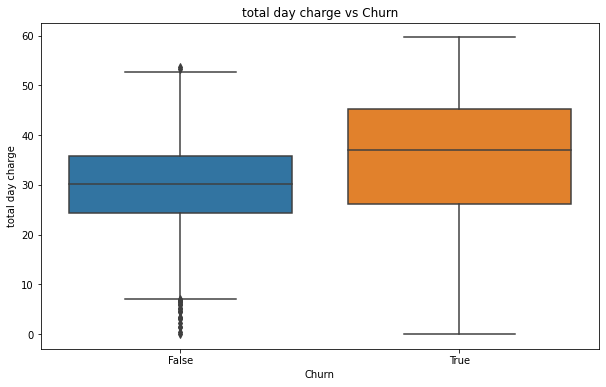

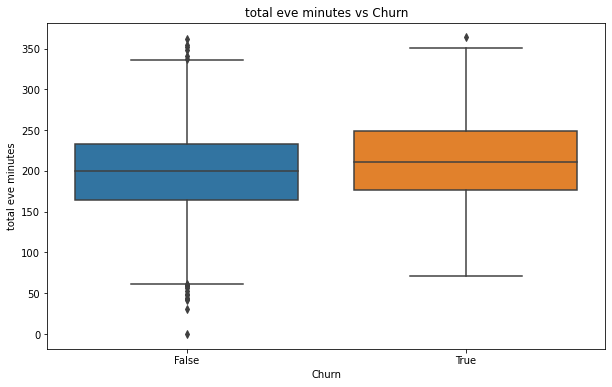

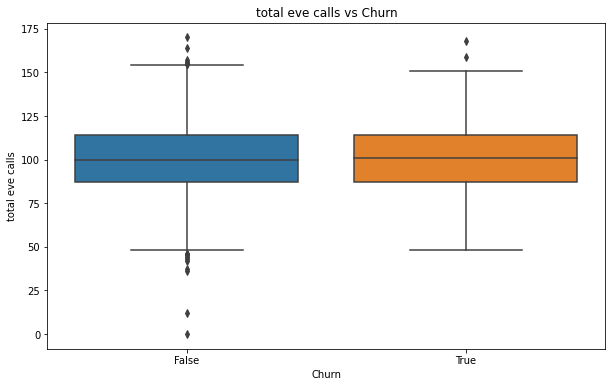

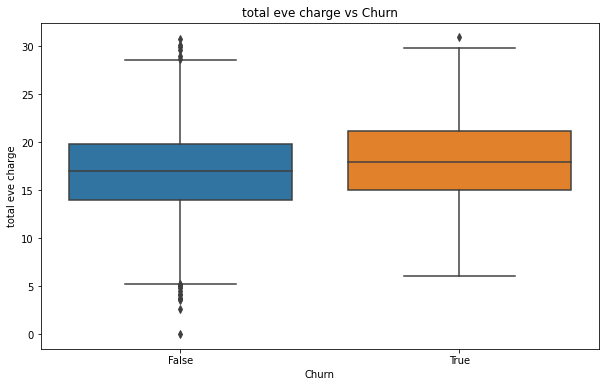

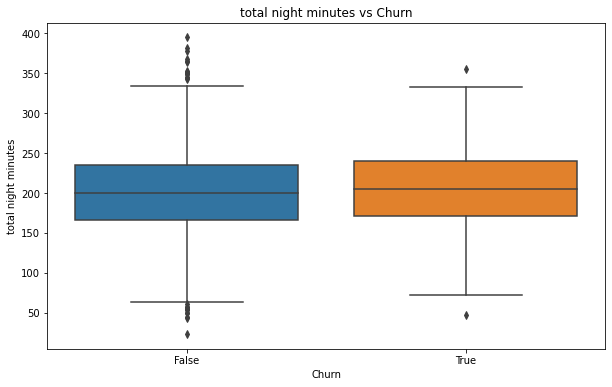

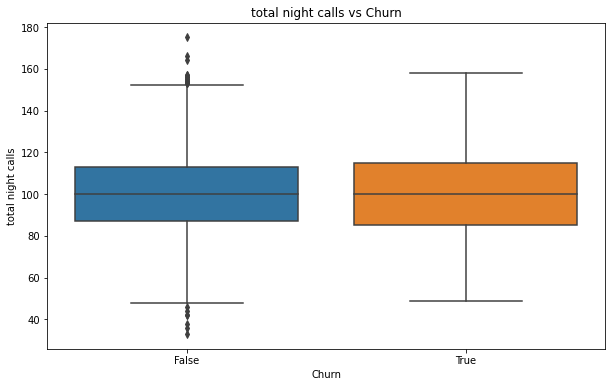

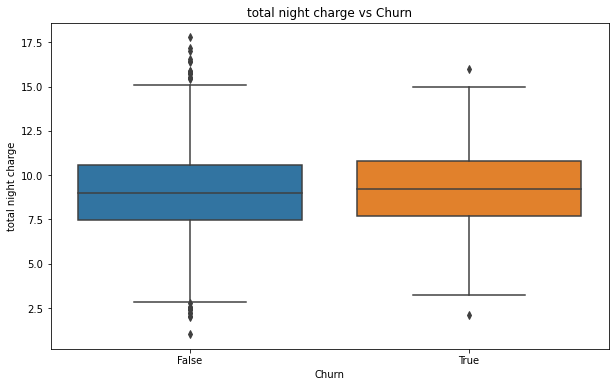

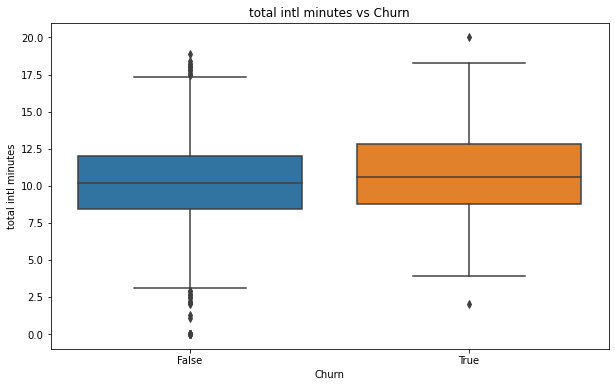

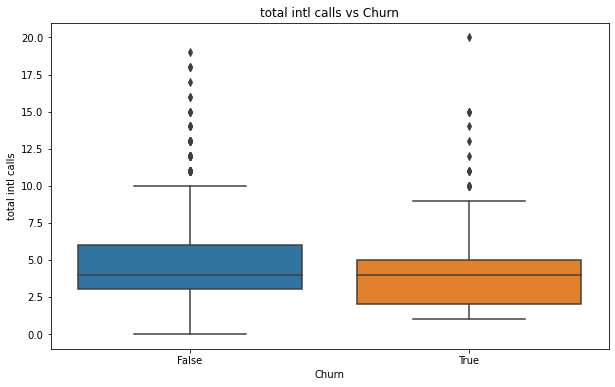

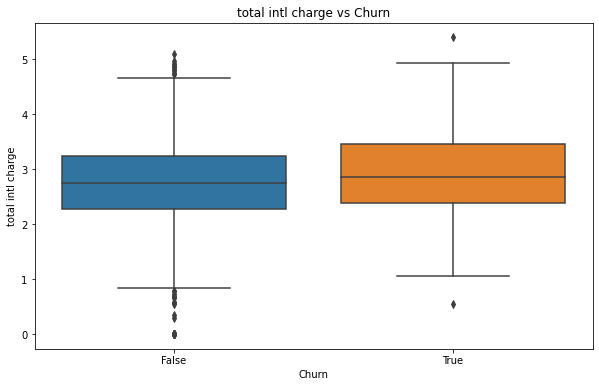

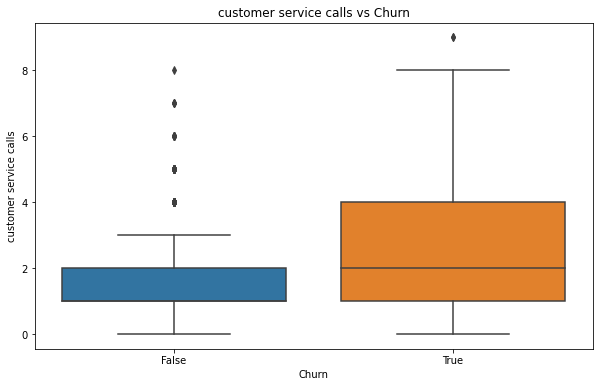

In [12]:
#Bivariate analysis for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'{feature} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

#### Comments:
It's interesting that customers with higher usage ie Total minutes (Day, Evening, Night, International) tend to churn as compared to low and average usage customers. Similar to the minutes features, higher charges seem to be associated with customers who churn, reflecting the direct relationship between usage and charges. This will however require more investigation

The only clear observation is that customers who have churned tend to have made more customer service calls, indicating that frequent customer service interactions might be linked to dissatisfaction and churn. This also reveals that the outliers exhibited in this column are of importance in the analysis.

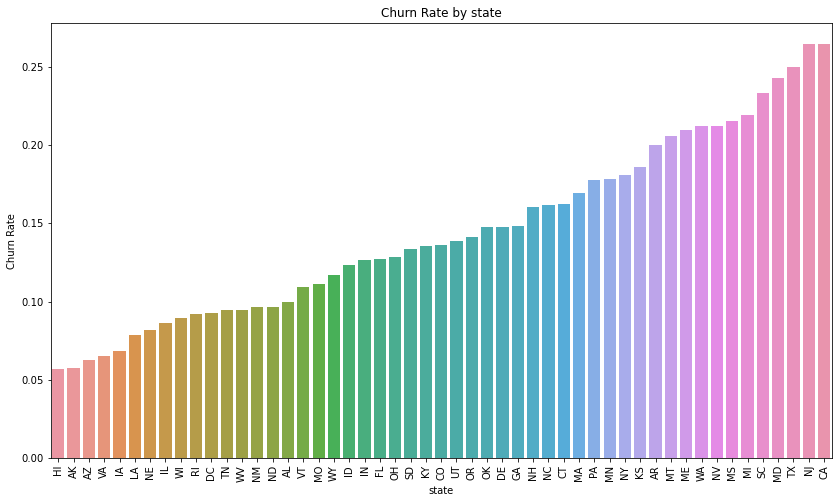

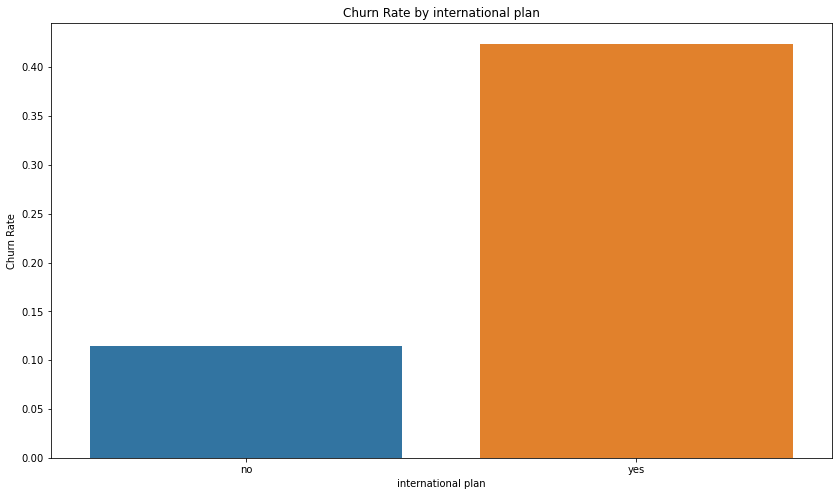

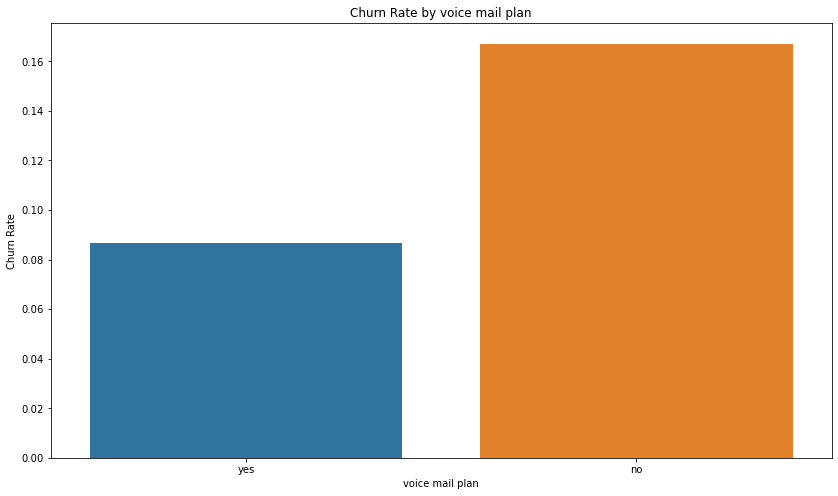

In [13]:
# Generate bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    churn_rate = data.groupby(feature)['churn'].mean().sort_values()
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=90 if feature == 'state' else 0)
    plt.show()

 #### Comments:
Customers with an international plan are more likely to churn, hence indicating some dissatisfaction with the service, given the observations from earlier this could be due to the charges on international calls. This shall be investigated further.

Customers with Voice mail plans tend not to churn as opposed to those without. This could indicate the service is satisfactory to the customers. 
 

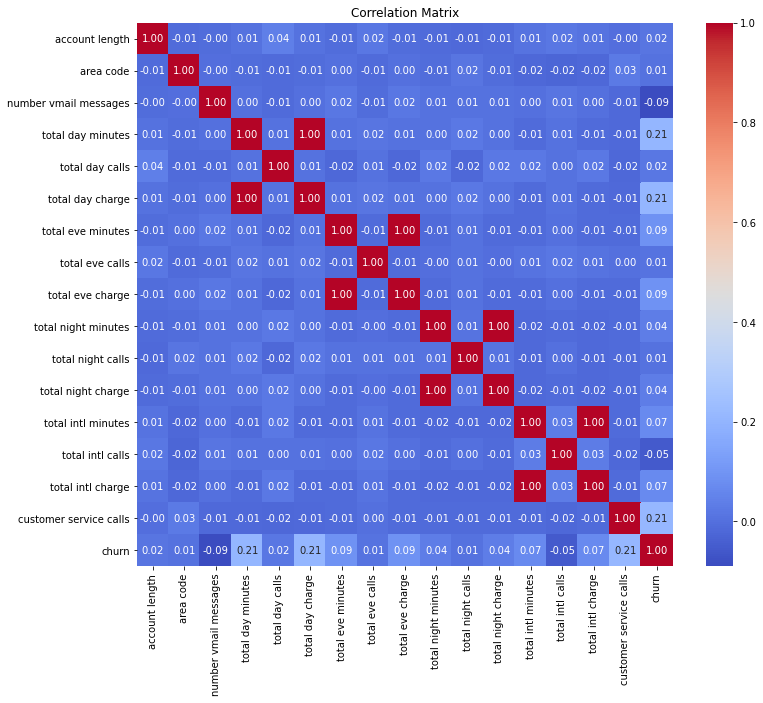

In [14]:
# Let's check for collinearity of features to each other and to the target variable

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

As per the graphic above, all the charge columns extremely correlated to the minutes columns to a value of 1. This ideally indicates we have to drop all the minutes columns and keep charge or vice versa.  
*This will be executed in the data preparation for modelling section.*

### Modelling


#### Data preparation for modelling

In [15]:
#Let's remind ourselves of how our dataset looks again before we start preparing it for modelling
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Column drops

Based on domain knowledge we will drop the phone number column since it would not make a good predictor of churn and we will drop the state column as well since we already have another location column(area code). 

Also based on the multi_collinearity check done above We will drop all the minute columns(Total Day minutes, Total Evening Minutes, Total Night Minutes and Total International Minutes) Due to extremely high multi_Collinearity with the charge columns

In [16]:
data = data.drop(columns =['phone number', 'state', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'],axis = 1)
data. head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


#### Binary column translation
Below, I will  do what most will consider blasphemous when it comes to modelling, I will do a label encoding before a train_test_split. Ideally this is supposed to lead to data leakage but I base my reasoning on [this](https://www.kaggle.com/discussions/questions-and-answers/343307) kaggle correspondence on the subject issue.

In [17]:
label_encoder = LabelEncoder()
data['churn'] = label_encoder.fit_transform(data['churn'])
data['international plan'] = label_encoder.fit_transform(data['international plan'])
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])

In [18]:
#Let's see how the dataset looks after the encoding above.
data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


Let's revisit the issue of class imbalance seen earlier in our analysis of the target variable.

Class Distribution:
 0    2850
1     483
Name: churn, dtype: int64

Class Proportions:
 0    0.855086
1    0.144914
Name: churn, dtype: float64


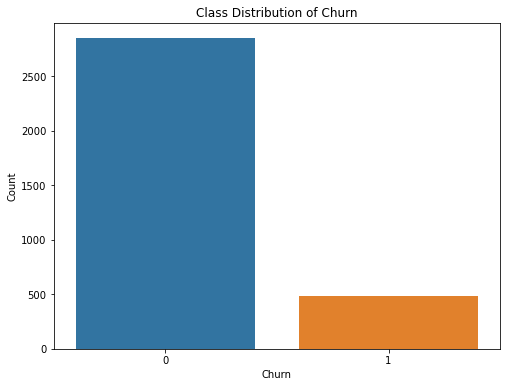

In [19]:
class_counts = data['churn'].value_counts()
print("Class Distribution:\n", class_counts)
print("\nClass Proportions:\n", class_counts / len(data))

# Visualize class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=data)
plt.title('Class Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

As seen above we do have a major issue of class imbalance that has to be addressed before we begin the modelling process. we will use SMOTE as our method to resolve the issue.

We will also define our Target and Predictors

In [20]:
# Defining of the target(y) and the predictors(X)
X = data.drop(columns = ['churn'])
y = data['churn']

# Split the data into training and testing sets to (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Previous original class distribution(y_train)
print('Original Class Distribution: \n')
print(y_train.value_counts())

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Let's see how the class look after applying SMOTE
print("Class Distribution After Resampling:\n", pd.Series(y_train_resampled).value_counts())


Original Class Distribution: 

0    1993
1     340
Name: churn, dtype: int64
Class Distribution After Resampling:
 1    1993
0    1993
Name: churn, dtype: int64


#### Baseline Model.
Since our data is already prepared for modelling. We will begin the process by comparing 3 classifiers(DT,KNN & LR) all using their default parameters and with the data scaled using the Standard scaler. The best performing model will be chosen as our Baseline model.
We will use accuracy and F1_score as the metric on this particular section. And we will also print out a confusion matrix in the process.
May the best model win.

In [21]:
# Construct pipelines with default values

# Default Decision Tree Model
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(random_state = 42))])
# Default KNN Model
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier())])
# Default Logistic Regression Model
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state = 42))])
                     
# List of pipelines for ease of iteration
pipelines = [pipe_dt, pipe_knn, pipe_lr]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'K-Nearest Neighbors', 2: 'Logistic Regression'}

# Fit the pipelines and compare metrics
print("Training and evaluating baseline models...\n")
for idx, pipe in enumerate(pipelines):
    pipe.fit(X_train_resampled, y_train_resampled)
    y_pred = pipe.predict(X_test)
    # We will use Accuracy and F1_score as a combined metric for our models.    
    print(f'{pipe_dict[idx]} pipeline metrics:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    print(f'F1-Score: {f1_score(y_test, y_pred):.3f}')
    print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n')

Training and evaluating baseline models...

Decision Tree pipeline metrics:
Accuracy: 0.800
F1-Score: 0.537
Confusion Matrix:
 [[684 173]
 [ 27 116]]

K-Nearest Neighbors pipeline metrics:
Accuracy: 0.744
F1-Score: 0.448
Confusion Matrix:
 [[640 217]
 [ 39 104]]

Logistic Regression pipeline metrics:
Accuracy: 0.705
F1-Score: 0.420
Confusion Matrix:
 [[598 259]
 [ 36 107]]



It's quite evident the `Decision Tree Model` is the best classifier amongst the three. Hence We will proceed to tune this particular model below and see if it will perform better. 
We will use Gridsearch to find the best hyperparameters.

#### Decision Tree Classifier

In [38]:
# let's see the default parameters that got the model to an accuracy of 0.800
default_params = pipe_dt.steps[1][1].get_params()
print(default_params)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}


In [47]:
# Let's tune the model for optimal performance
"""
My tuning process:
 - Instatiate a model with the default parameters
 - Apply GridsearchCV to identify the optimal parameters
 - Find the optimal model
 - Score the model by it's accuracy, f1_score and print out a confusion matrix of the same.
"""
#Defining parameter ranges for the 3 main parameters
param_range_max_depth = [None, 1,2,3,4,5] 
param_range_min_samples_split = [2, 3, 4, 5]
param_range_min_samples_leaf = [1, 2, 3, 4, 5]

# Set grid search params
grid_params = [{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range_min_samples_leaf,
                'clf__max_depth': param_range_max_depth,
                'clf__min_samples_split': param_range_min_samples_split,
                'clf__max_features': param_range_max_features}]

# Construct grid search
gs_dt = GridSearchCV(pipe_dt, grid_params, cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Fit using grid search
gs_dt.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_dt = gs_dt.best_estimator_

# Predict with the best estimator
y_pred_dt = best_dt.predict(X_test)

# Evaluate the model with all metrics
print("Best Decision Tree Model Metrics:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}')
print(f'F1-Score: {f1_score(y_test, y_pred_dt):.3f}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_dt)}')

# Output the best parameters
print(f'Best Parameters: {gs_dt.best_params_}')

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    4.5s


Best Decision Tree Model Metrics:
Accuracy: 0.803
F1-Score: 0.543
Confusion Matrix:
 [[686 171]
 [ 26 117]]
Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 2145 out of 2160 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    9.5s finished


Off the results above, by attempting 2160 fits with different parameter combinations, the verdict is: changing the criterion from `gini` to `entropy` increases the accuracy of the model from 0.800 to 0.803. This is while the model used defaults on all the other parameters.
Let's however try to see if we could get better results with an ensemble model, specifically `A Random Forest Model`. We will create one with it's default parameters then attempt to tune it.

#### Random Forest Classifier

In [48]:
"""
My tuning process:
 - Instatiate a model with the default parameters
 - Apply GridsearchCV to identify the optimal parameters
 - Find the optimal model
 - Score the model by it's accuracy, f1_score and print out a confusion matrix of the same.
"""


# Construct pipeline for Random Forest with default values
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier())]) 

# Define parameter grid for Grid Search
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_features': ['auto', 'sqrt', 'log2'],
    'clf__max_depth': [None, 10, 20, 30, 40, 50],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
gs_rf = GridSearchCV(pipe_rf, param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
gs_rf.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_rf = gs_rf.best_estimator_

# Predict with the best estimator
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model with all metrics
print("Best Random Forest Model Metrics:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}')
print(f'F1-Score: {f1_score(y_test, y_pred_rf):.3f}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_rf)}')

# Output the best parameters
print(f'Best Parameters: {gs_rf.best_params_}')

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1458 out of 1458 | elapsed:  3.1min finished


Best Random Forest Model Metrics:
Accuracy: 0.925
F1-Score: 0.746
Confusion Matrix:
 [[815  42]
 [ 33 110]]
Best Parameters: {'clf__max_depth': 40, 'clf__max_features': 'auto', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}


The tuned random forest model has the best accuracy on the test data so far. The accuracy is at 0.925 compared to the 0.803 of the tuned decision tree. Let's see how a `XGboost model` will perform before we settle on a classifier.

#### XGBoost Classifier

In [51]:
"""
My tuning process:
 - Instatiate a model with the default parameters
 - Apply GridsearchCV to identify the optimal parameters
 - Find the optimal model
 - Score the model by it's accuracy, f1_score and print out a confusion matrix of the same.
"""
# Construct pipeline for XGBoost
pipe_xgb = Pipeline([('scl', StandardScaler()),
                   ('clf', XGBClassifier())]) 

#Define parameter grid for Grid Search
param_grid = {
    'clf__n_estimators': [50, 100, 200, 300],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__max_depth': [3, 5, 10, 20, 30, 50],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform Grid Search with cross-validation
gs_xgb = GridSearchCV(pipe_xgb, param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
gs_xgb.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_xgb = gs_xgb.best_estimator_

# Predict with the best estimator
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model with all metrics
print("Best XGBoost Model Metrics:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}')
print(f'F1-Score: {f1_score(y_test, y_pred_xgb):.3f}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_xgb)}')

# Output the best parameters
print(f'Best Parameters: {gs_xgb.best_params_}')

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1037 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:  5.9min finished


Best XGBoost Model Metrics:
Accuracy: 0.931
F1-Score: 0.765
Confusion Matrix:
 [[819  38]
 [ 31 112]]
Best Parameters: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 20, 'clf__n_estimators': 200, 'clf__subsample': 0.8}


So far, with XGBoost classifier has proven to be the best as expected. Moving forward I will attempt to work on this model to see if we can make it even more efficient.